# CREDIT RISK ANALYSIS

## Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

## Business Objective

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

* Approved: The Company has approved loan Application

* Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

* Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

* Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Importing the libraries and Data

In [1]:
# basic analysis libraries
import sys
import numpy as np
import pandas as pd

# visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import plotly.io as pio
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot, init_notebook_mode
pio.renderers
import seaborn as sns
import itertools

#ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the Data

application_data = pd.read_csv("application_data.csv")
previous_app = pd.read_csv("previous_application.csv")
column_data = pd.read_csv("columns_description.csv")

## ANALYSIS OF APPLICATION DATA SET

### Data Dimensions

In [3]:
print ("Application_data row,columns:",application_data.shape)
print ("Previous_application data row,columns:",previous_app.shape)
print ("Column_data row,columns:",column_data.shape)

Application_data row,columns: (307511, 122)
Previous_application data row,columns: (1670214, 37)
Column_data row,columns: (160, 5)


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

* There are 106 Numerical Columns
* There are 16 Categorical Columns

### Checking the Null Values

In [6]:
sum_null = application_data.isnull().sum()
#rounding the %value for easier readability
mean_null = round(100*(application_data.isnull().sum()/len(application_data.index)),2) 
nulls = pd.concat([sum_null, mean_null], axis = 1)
nulls.rename(columns = {0:'count', 1:'percentage'}, inplace = True)
nulls

,count,percentage
SK_ID_CURR,0,0.00
TARGET,0,0.00
NAME_CONTRACT_TYPE,0,0.00
CODE_GENDER,0,0.00
FLAG_OWN_CAR,0,0.00
FLAG_OWN_REALTY,0,0.00
CNT_CHILDREN,0,0.00
AMT_INCOME_TOTAL,0,0.00
AMT_CREDIT,0,0.00
AMT_ANNUITY,12,0.00


In [7]:
#count of variables with null values

nulls[nulls['count']>0]['count'].count()

67

There are 67 variables with null values, we'll check the ones with missing % above 45 

In [8]:
application_missing_data = nulls[nulls['percentage']>45.00]
application_missing_data.reset_index(level=0, inplace=True)
application_missing_data = application_missing_data.sort_values('percentage', ascending=False)
print(len(application_missing_data))
display(application_missing_data)

49


,index,count,percentage
6,COMMONAREA_AVG,214865,69.87
34,COMMONAREA_MEDI,214865,69.87
20,COMMONAREA_MODE,214865,69.87
42,NONLIVINGAPARTMENTS_MEDI,213514,69.43
28,NONLIVINGAPARTMENTS_MODE,213514,69.43
14,NONLIVINGAPARTMENTS_AVG,213514,69.43
44,FONDKAPREMONT_MODE,210295,68.39
40,LIVINGAPARTMENTS_MEDI,210199,68.35
12,LIVINGAPARTMENTS_AVG,210199,68.35
26,LIVINGAPARTMENTS_MODE,210199,68.35


In [9]:
fig = px.bar(application_missing_data, x='index', y='percentage',
            title="Columns with NA counts > 45% ",
             labels={'index':'Column','percentage':'Percentage of Missing Data'}, height=600)
fig.show()

There are 49 columns with missing data above 45%

On the basis of our observation, we will drop the columns with NAN count > 45% (adhering to the industry standard).


In [10]:
application_data= application_data.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis = 1)

In [11]:
#Checking the number of columns with null values to be worked on
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

### Missing Value Suggestions

1) AMT_ANNUITY

In [12]:
application_data['AMT_ANNUITY'].isnull().sum()

12

In [13]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

* Between Mean and Median, Median seems to be of lower value (more reliable)
* We can impute NA with Median for 'AMT_ANNUITY'. 

2) 'AMT_GOODS_PRICE'

In [14]:
application_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [15]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Similarly, we can impute NA with Median for 'AMT_GOODS_PRICE' as well

3) 'NAME_TYPE_SUITE'

In [16]:
application_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [17]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

We can impute Mode here. Fill NA for 'NAME_TYPE_SUITE' with Unaccompanied.

4) 'OCCUPATION_TYPE'

In [18]:
application_data['OCCUPATION_TYPE'].isnull().sum()

96391

In [19]:
application_data['OCCUPATION_TYPE'].value_counts(dropna = False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

We cannot apply mode here as null counts are extremely high. It needs further analysis. 

Comparing ORGANIZATION_TYPE and NAME_INCOME_TYPE for further analysis

In [20]:
application_data[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(15)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,Business Entity Type 3,Working
1,School,State servant
2,Government,Working
3,Business Entity Type 3,Working
4,Religion,Working
5,Other,State servant
6,Business Entity Type 3,Commercial associate
7,Other,State servant
8,XNA,Pensioner
9,Electricity,Working


In [21]:
application_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [22]:
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

* After observing the above data we see that 'Pensioner' value in NAME_INCOME_TYPE is approximately equal to null values in ORGANIZATION_TYPE column (MAR). All XNA Values in ORGANIZATION_TYPE can be replaced by 'Pensioner'.
* We conclude that 'Pensioner' is the most frequent value (almost 57%) of the null values of OCCUPATION_TYPE. Thus, 57% of null values can be filled by 'Pensioner'.
* For the pending 43% of null values in OCCUPATION_TYPE, there are 3 possible options:
1) Preferably, we can use impute the blanks with the top two value counts i.e 'Labourers' and 'Sales Staff' equally (Filling the values with just the top value 'Labourers' would create an imbalance).
2) We go with mode here and impute 'Labourers' for the 43% missing
3) Replace XNA with Others

5) 'EXT_SOURCE_2'

In [23]:
application_data['EXT_SOURCE_2'].isnull().sum()

660

In [24]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

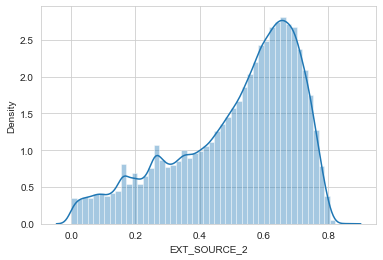

In [25]:
sns.set_style('whitegrid') 
sns.distplot(application_data['EXT_SOURCE_2']) 
plt.show()

We can impute NA with Median for 'EXT_SOURCE_2'. Continuous Numeric Variable.

6) 'EXT_SOURCE_3'

In [26]:
application_data['EXT_SOURCE_3'].isnull().sum()

60965

In [27]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

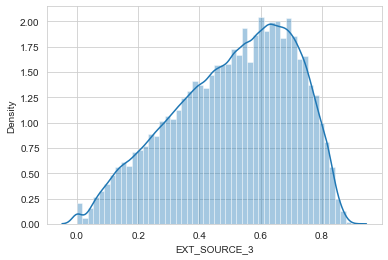

In [28]:
sns.set_style('whitegrid') 
sns.distplot(application_data['EXT_SOURCE_3']) 
plt.show()

Similarly, we can impute NA with Median for 'EXT_SOURCE_3'

7) 'OBS_30_CNT_SOCIAL_CIRCLE'

In [29]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [30]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

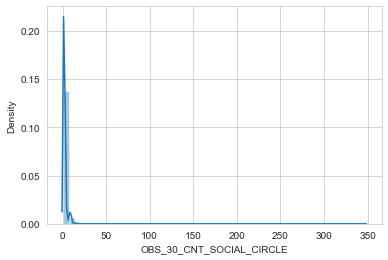

In [31]:
sns.set_style('whitegrid') 
sns.distplot(application_data['OBS_30_CNT_SOCIAL_CIRCLE']) 
plt.show()

8) 'AMT_REQ_CREDIT_BUREAU_HOUR'

In [32]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [33]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

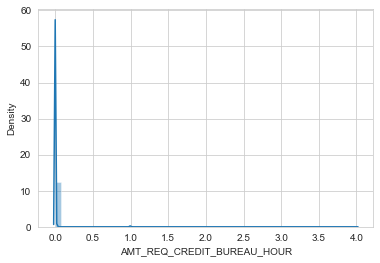

In [34]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_REQ_CREDIT_BUREAU_HOUR']) 
plt.show()

* After observing all '  '_CNT_SOCIAL_CIRCLE' and 'AMT_REQ_CREDIT_BUREAU_ '  ' columns, the suggestion would be to go with median values to fill NA (Mode can also be applied here, as per the graph analysis, however median is preferred).

9) 'DAYS_LAST_PHONE_CHANGE'

In [35]:
application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [36]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

We can impute NA with Median for 'DAYS_LAST_PHONE_CHANGE'

#### Categorical value 'Code_Gender' also has XNA values. Let's impute them.

In [37]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

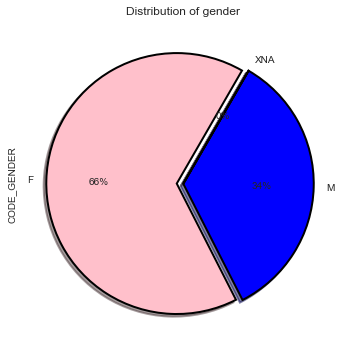

In [38]:
fig = plt.figure(figsize=(13,6))
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["pink","blue"],startangle = 60,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

We can use mode here and fill NA values with 'F'

PS: The Data is imbalanced

Now that we have taken care of missing value suggestions, let's move on to the next bit i.e Correcting Negative values and Outlier Analysis.

### Converting Negative values to Absolute Values

In [39]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head(3)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0


In [40]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED'])
application_data['DAYS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])

In [41]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH",]].head(3)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531


### Converting days to years for the above columns +  rounding up the values for easier readability

In [42]:
application_data['DAYS_BIRTH']= (application_data['DAYS_BIRTH']/365).astype(int)
application_data['DAYS_EMPLOYED'] = round(application_data['DAYS_EMPLOYED']/365).astype(float)
application_data['DAYS_REGISTRATION'] = round(application_data['DAYS_REGISTRATION']/365).astype(float)
application_data['DAYS_ID_PUBLISH'] = round(application_data['DAYS_ID_PUBLISH']/365).astype(float)

In [43]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH",]].head(3)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25,2.0,10.0,6.0
1,45,3.0,3.0,1.0
2,52,1.0,12.0,7.0


## Outlier Analysis

Since outliers are mosly present in numerical data, let's check the number of numerical columns we will be analysing 

In [44]:
# Checking the Number of numerical columns in application_data set
numerical_col = application_data.select_dtypes(include='number').columns
len(numerical_col)

61

There are 61 Numerical columns. 



We'll run a loop to plot the boxplots for all of them and summarise our outlier analysis at the end.

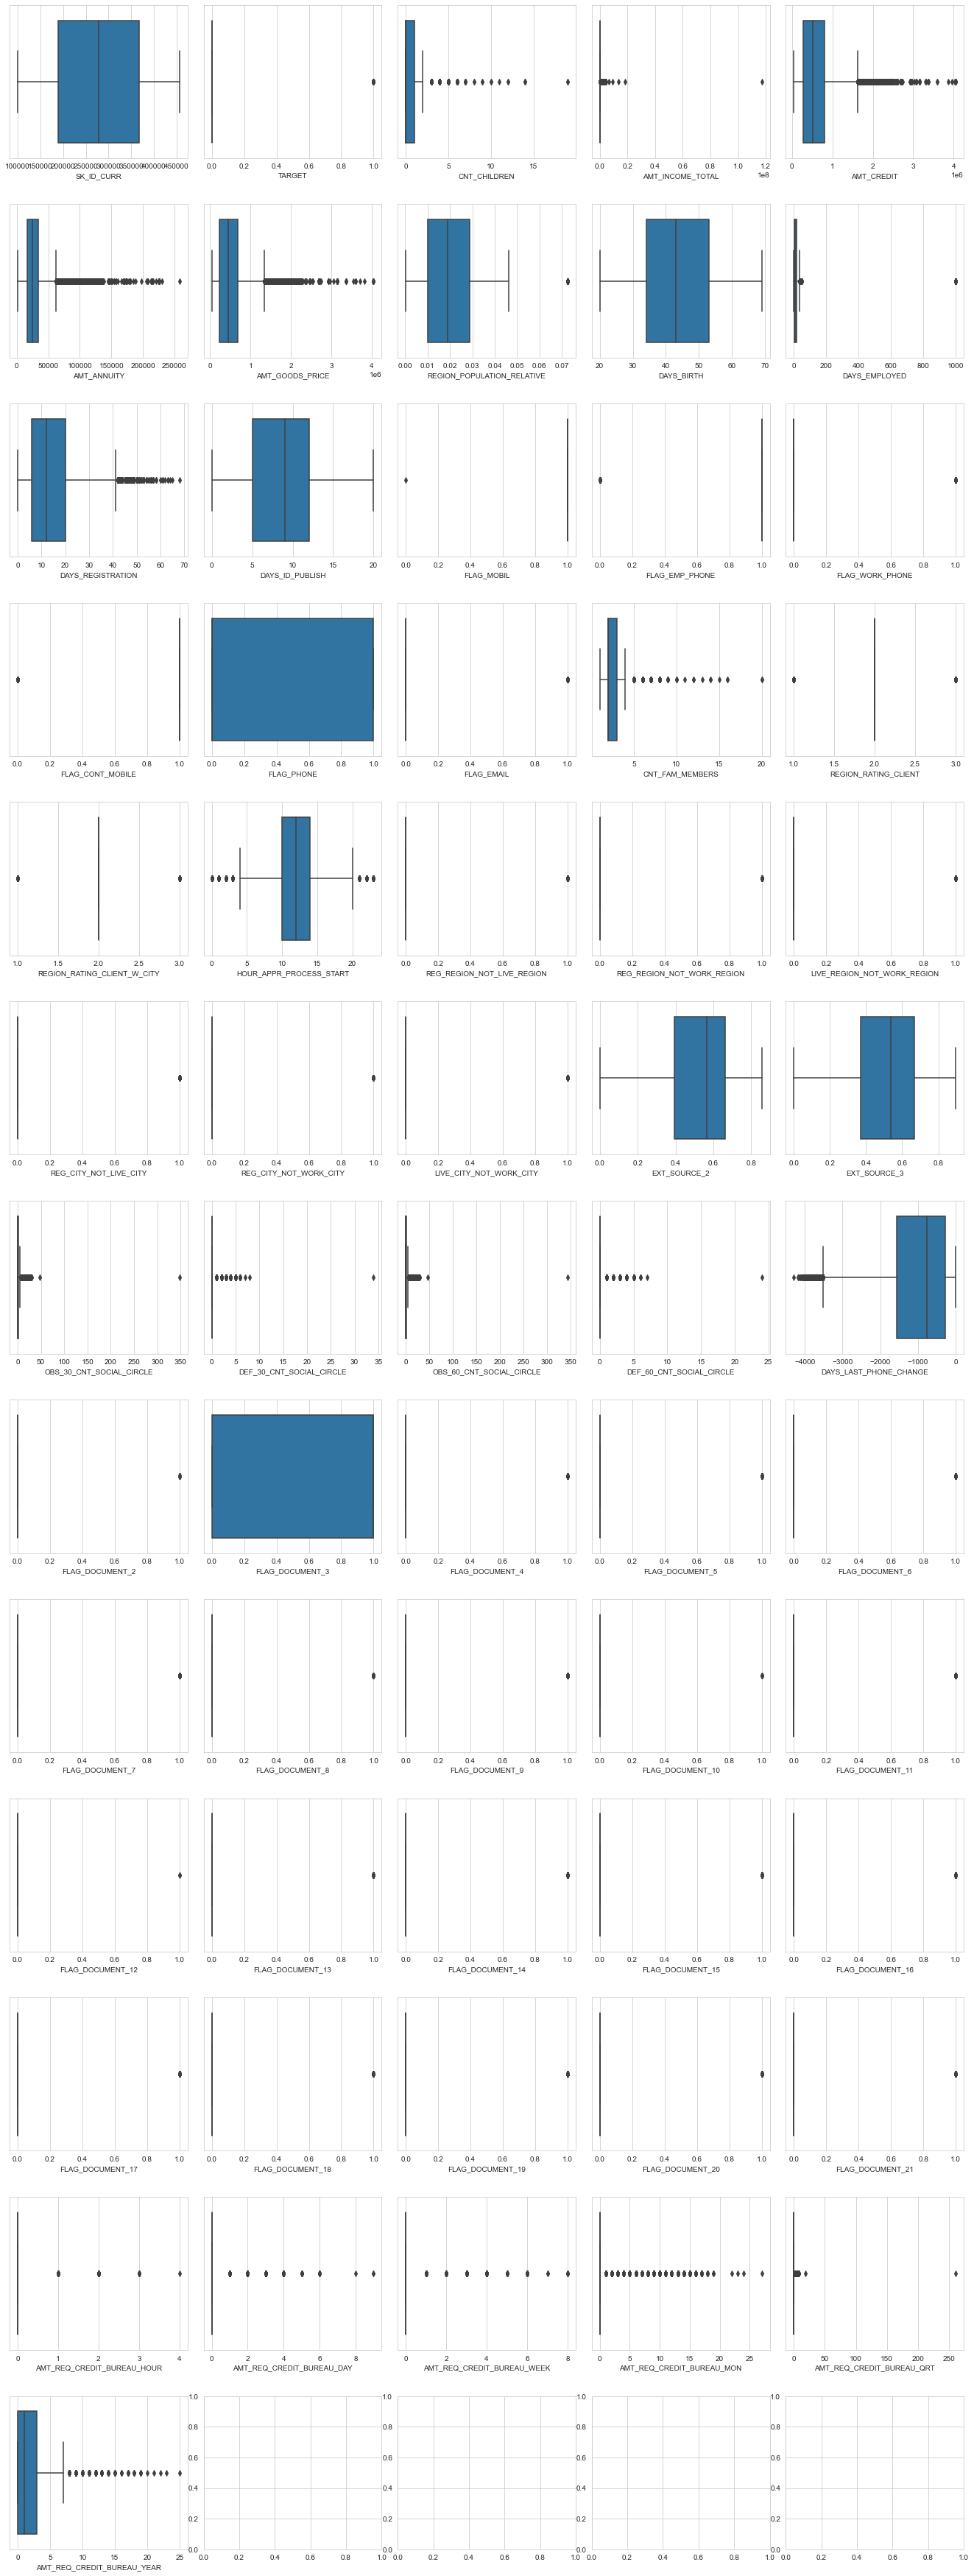

In [45]:
#creating subplots for numerical values
fig , axes = plt.subplots(nrows=13, ncols=5, constrained_layout=True)
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
#adding a loop
for ax, column in zip(axes.flatten(),numerical_col): 
    sns.boxplot(application_data[column],ax=ax)

* DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3  don’t have any outliers.


* From boxplot of CNT_CHILDREN , we can say that most of the clients have 1-2 children. Heavy outliers.



* IQR for AMT_INCOME_TOTAL is very slim and it has a large number of outliers.



* For AMT_CREDIT most of the Credit amount of the loan of customers are present in the third quartile. Heavy outliers.



* The third quartile AMT_ANNUITY is slightly larger than the First quartile and there is a large number of outliers.



* AMT_GOODS_PRICE, REGION_POPULATION, DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE is mostly skewed towards the third quartile and all have a large number of outliers.



* From boxplot of CNT_FAM_MEMBERS , we can say that most of the clients have 3-4 family members. There are some outliers present.



* OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR, 



* All 'FLAG_DOCUMENTS' columns (except 'FLAG_DOCUMENT_3) are very slim and have heavy outliers.

### Data imbalance

WE've seen that 'CODE_GENDER' has data imbalance, it has more data on females than males.



Let's check if TARGET column has any imbalance

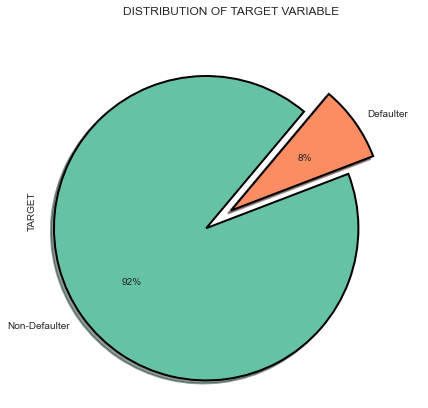

In [46]:
plt.figure(figsize=(14,7))
application_data['TARGET'].value_counts().plot.pie(autopct = '%1.0f%%',colors = sns.color_palette('Set2'),
startangle = 50,labels=['Non-Defaulter','Defaulter'],
wedgeprops={'linewidth':2,'edgecolor':'k'},explode=[.2,0],shadow =True)
plt.title('DISTRIBUTION OF TARGET VARIABLE')
plt.show()

There is a heavy imbalance in the data

## Univariate Analysis

### Dividing the data into Non-Defaulters and Defaulters based on 'TARGET' variable and running our analysis on it

In [47]:
target0 = application_data.loc[application_data["TARGET"]==0]
target1 = application_data.loc[application_data["TARGET"]==1]

### Numerical and Categorical Column Analysis

We'll be running our analysis on the important driver variables. Let's look at them one by one.

#### 1) CNT_FAM_MEMBERS

In [48]:
a0 = target0['CNT_FAM_MEMBERS'].value_counts()
application_data = pd.DataFrame({'labels':a0.index, 'values':a0.values})

a1 = target1['CNT_FAM_MEMBERS'].value_counts()
application_data = pd.DataFrame({'labels':a1.index, 'values':a1.values})

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Family Members : Non-Defaulters","Family Members : Defaulters"))

fig.add_trace(go.Pie(labels=a0.index, values=a0.values), 1, 1)
fig.add_trace(go.Pie(labels=a1.index, values=a1.values), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent")
fig.update_layout(showlegend=True, title_text="Count of Family Members")

fig.show()

After comparing the count of Family members in the Repayer plot vs the defaulter plot, we observe that there is a slight increase in the defaulter plot for families that have 1,3,4 and 5 children (the difference is only by a few points). However, families with 2 children are more likely to repay than default.

Let's check if Gender has any effect on repaying status

#### 2) CODE_GENDER

In [49]:
a0 = target0['CODE_GENDER'].value_counts()
application_data = pd.DataFrame({'labels':a0.index, 'values':a0.values})

a1 = target1['CODE_GENDER'].value_counts()
application_data = pd.DataFrame({'labels':a1.index, 'values':a1.values})

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Gender Distribution for Non-Defaulters","Gender Distribution for Defaulters"))

fig.add_trace(go.Pie(labels=a0.index, values=a0.values), 1, 1)
fig.add_trace(go.Pie(labels=a1.index, values=a1.values), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent")
fig.update_layout(showlegend=True, title_text="Gender Distribution")

fig.show()

In the above plot we observe that the number of male defaulters are more than females. Men are more likely to default by 9%

Moving on to the sources of income

#### 3) NAME_INCOME_TYPE

In [50]:
a0 = target0['NAME_INCOME_TYPE'].value_counts()
application_data = pd.DataFrame({'labels':a0.index, 'values':a0.values})

a1 = target1['NAME_INCOME_TYPE'].value_counts()
application_data = pd.DataFrame({'labels':a1.index, 'values':a1.values})

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Income types of Non-Defaulters","Income types of Defaulters"))

fig.add_trace(go.Pie(labels=a0.index, values=a0.values), 1, 1)
fig.add_trace(go.Pie(labels=a1.index, values=a1.values), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent")
fig.update_layout(showlegend=True, title_text="Income Source")

fig.show()

* Here we observe that Commercial Associate, Pensioner, State Servant have less % in the defaulter list. They are less likely to default than Working individuals (classed under 'Labourers' in the data-set).


* Unemployed individuals are the heaviest defaulters.


* Students and Businessmen tend to pay back the amount on time, they have no defaulters. 

Let's check if Family Status has any effect on Payment Difficulies

#### 4) NAME_FAMILY_STATUS

In [51]:
a0 = target0['NAME_FAMILY_STATUS'].value_counts()
application_data = pd.DataFrame({'labels':a0.index, 'values':a0.values})

a1 = target1['NAME_FAMILY_STATUS'].value_counts()
application_data = pd.DataFrame({'labels':a1.index, 'values':a1.values})

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Family Status of Non-Defaulters","Family Status of Defaulters"))

fig.add_trace(go.Pie(labels=a0.index, values=a0.values), 1, 1)
fig.add_trace(go.Pie(labels=a1.index, values=a1.values), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent")
fig.update_layout(showlegend=True, title_text="Family Status")

fig.show()

* Married individuals have a lower default %.
* Single, Civil marriage and Seperated clients seem to have more payment difficulties than Widows

Let's look into Education type of our clients and it's effect on Payment difficulties

#### 5) NAME_EDUCATION_TYPE

In [52]:
a0 = target0['NAME_EDUCATION_TYPE'].value_counts()
application_data = pd.DataFrame({'labels':a0.index, 'values':a0.values})

a1 = target1['NAME_EDUCATION_TYPE'].value_counts()
application_data = pd.DataFrame({'labels':a1.index, 'values':a1.values})

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Education Type of Non-Defaulters","Education Type of Defaulters"))

fig.add_trace(go.Pie(labels=a0.index, values=a0.values), 1, 1)
fig.add_trace(go.Pie(labels=a1.index, values=a1.values), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent")
fig.update_layout(showlegend=True, title_text="Education Type")

fig.show()

* We observe that individuals with Secondary higher education are 8% more likely to default
* Clients with Higher education have lower number of defaulters
* Incomplete higher education and Lower secondary are slightly more in the defaulters list

Next, let's compare the contract types

#### 6) NAME_CONTRACT_TYPE

In [53]:
a0 = target0['NAME_CONTRACT_TYPE'].value_counts()
application_data = pd.DataFrame({'labels':a0.index, 'values':a0.values})

a1 = target1['NAME_CONTRACT_TYPE'].value_counts()
application_data = pd.DataFrame({'labels':a1.index, 'values':a1.values})

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Contract Type of Non-Defaulters","Contract Type of Defaulters"))

fig.add_trace(go.Pie(labels=a0.index, values=a0.values), 1, 1)
fig.add_trace(go.Pie(labels=a1.index, values=a1.values), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent")
fig.update_layout(showlegend=True, title_text="Contract Type")

fig.show()

* We observe that Cash loan clients are 3% more likely to default
* The number of repayers are more for revolving loans

### Bivariate Analysis (Numerical vs Categorical)

#### INCOME AMOUNT vs EDUCATION STATUS vs FAMILY STATUS

The below bar chart is for 'Non-Defaulters'

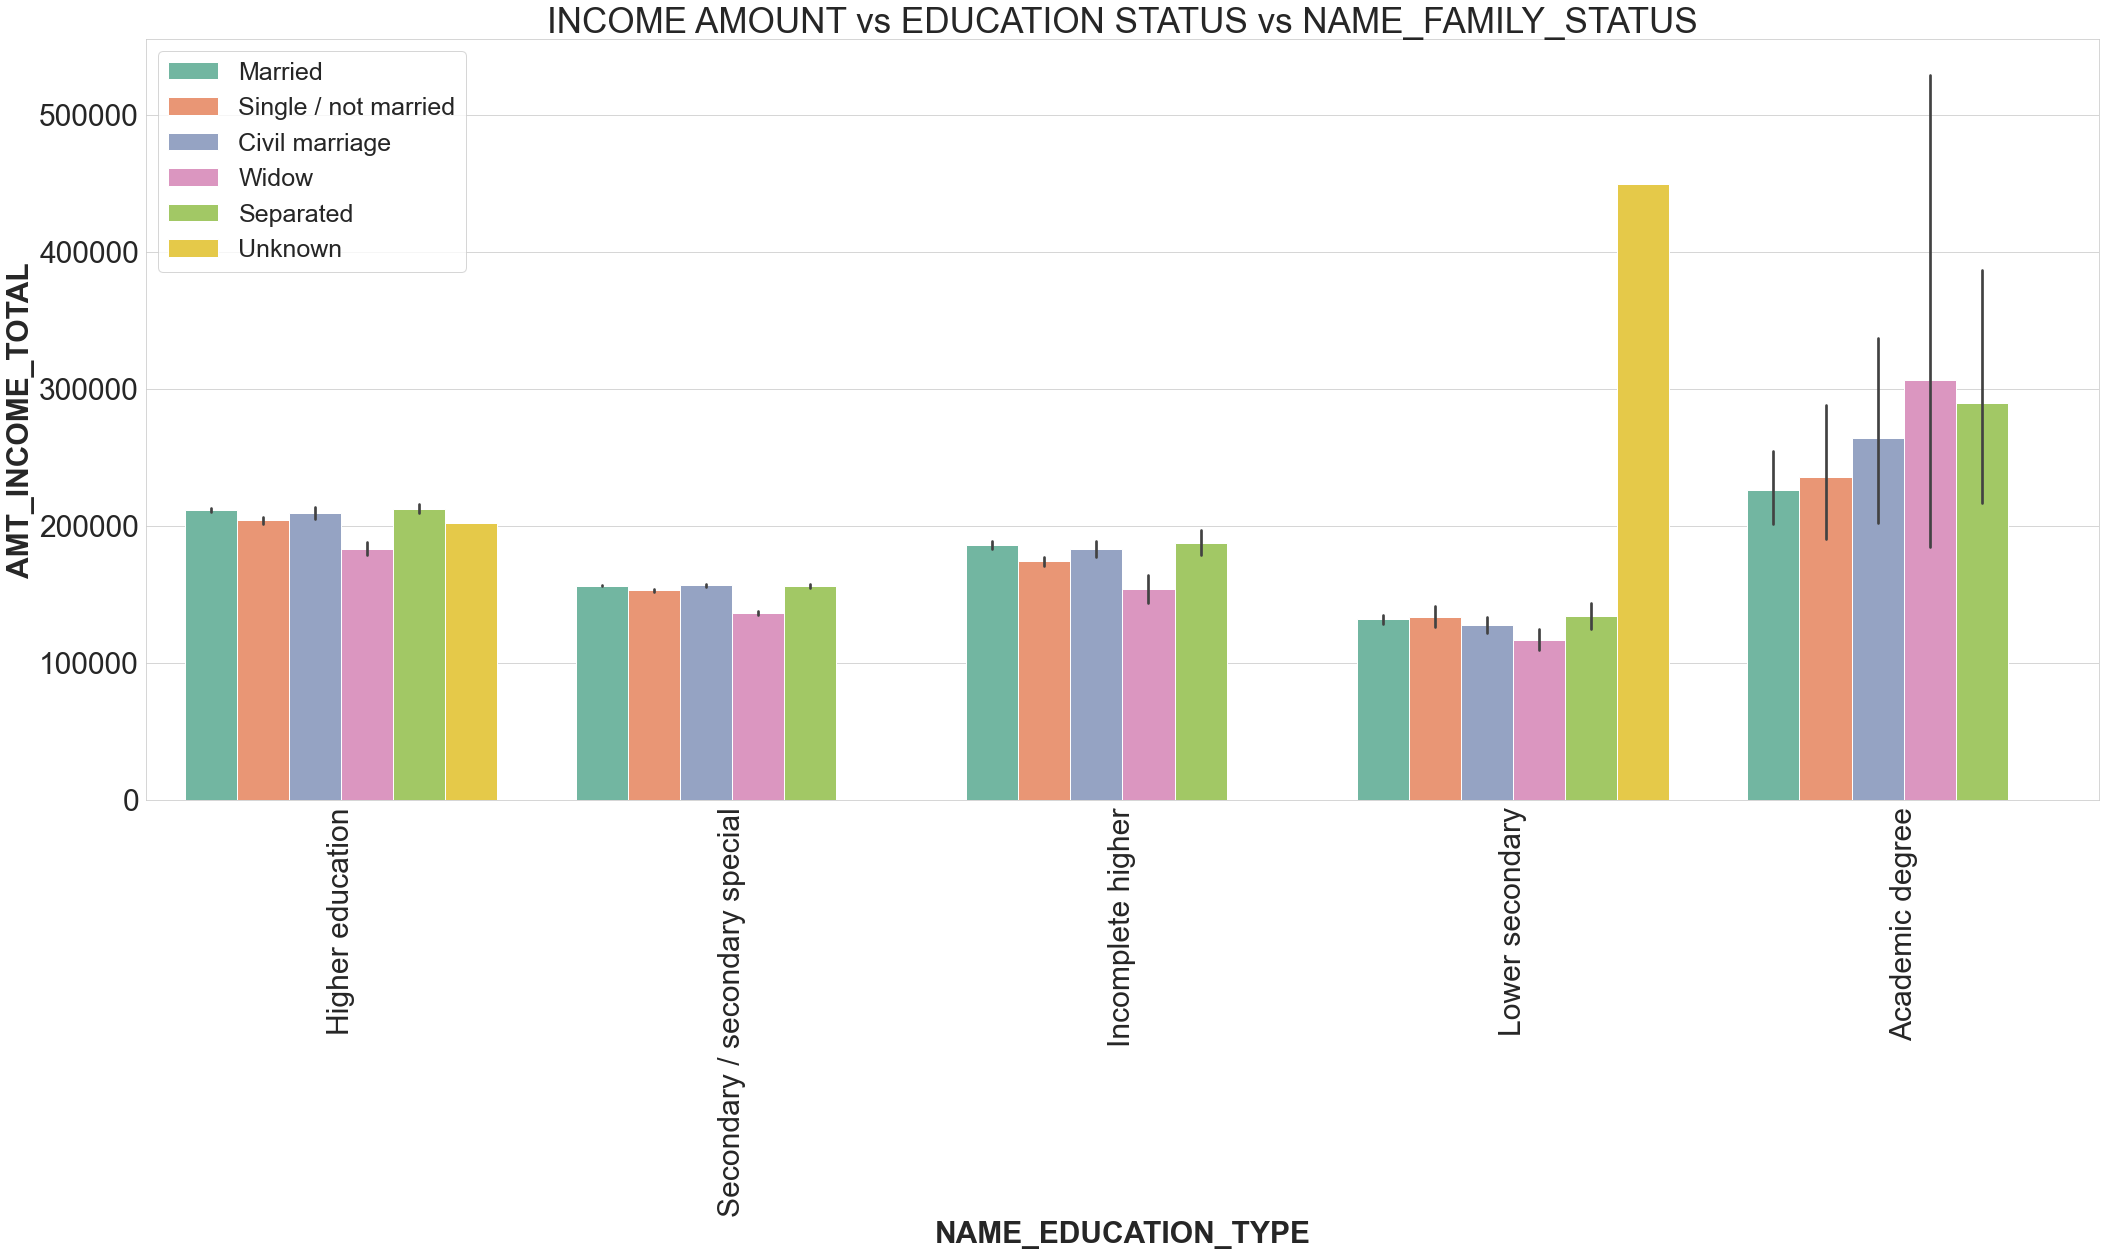

In [54]:
plt.figure(figsize=(35,14)) 

sns.barplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

plt.legend( loc = 'upper left', fontsize=25)                                              #Adjusting legend position
plt.title('INCOME AMOUNT vs EDUCATION STATUS vs NAME_FAMILY_STATUS',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

The below bar chart is for 'Defaulters

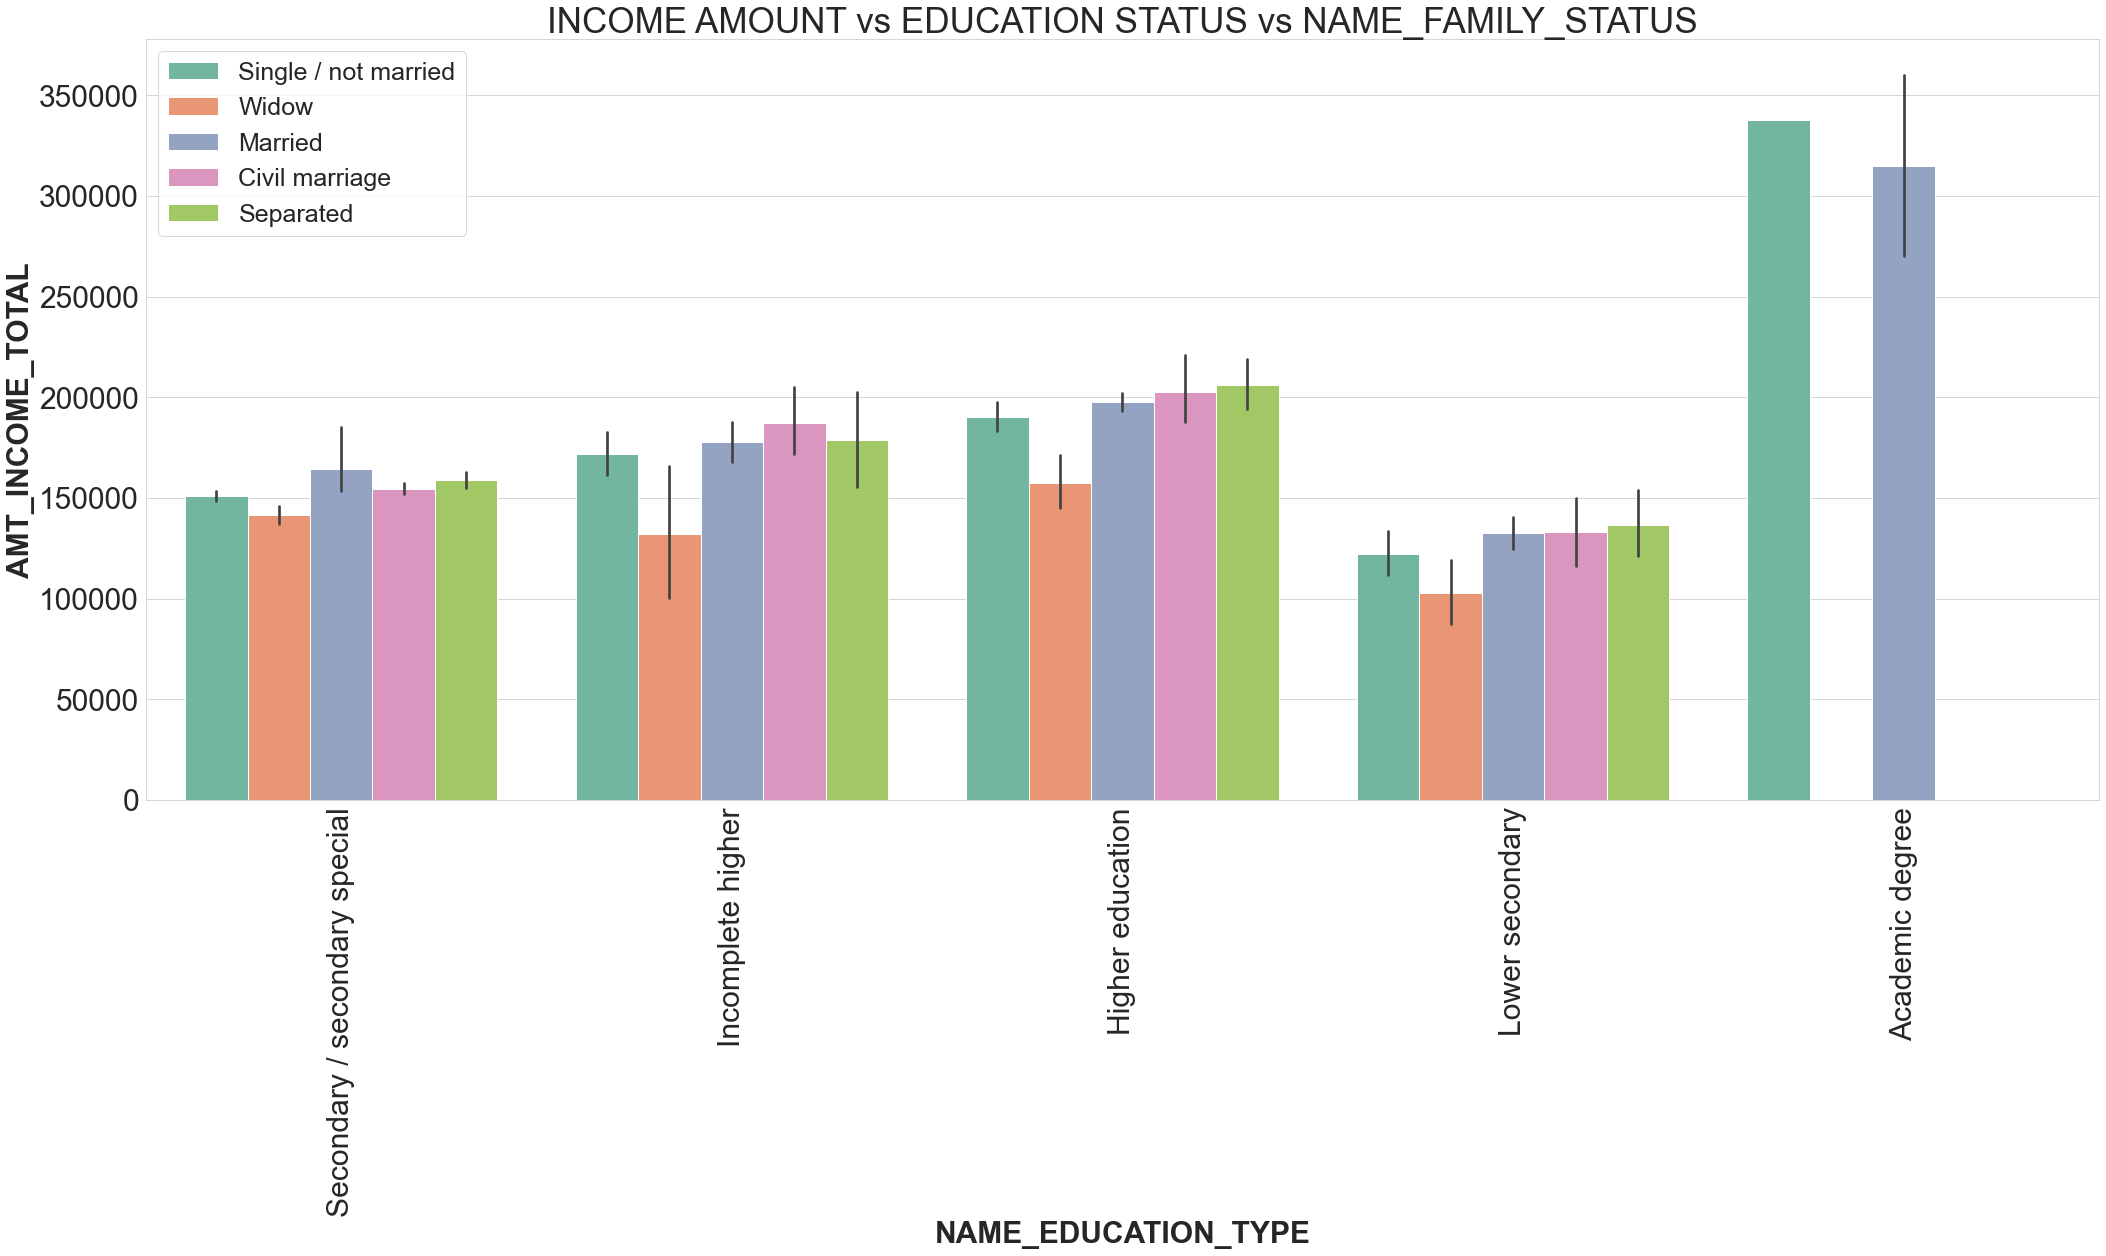

In [55]:
plt.figure(figsize=(35,14)) 

sns.barplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

plt.legend( loc = 'upper left', fontsize=25)                                              #Adjusting legend position
plt.title('INCOME AMOUNT vs EDUCATION STATUS vs NAME_FAMILY_STATUS',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

When we compare the Income type, Education Type and Family Status for repayers and defaults, we observe the following:
* Overall, individuals with academic degree are less likely to default and they have higher income than the rest.
* Widows with academic degree are least likely to default.
* Clients having Higher Education tend to have the highest income compared to others and are less likely to default.
* Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.
* The income amount for Married clients with an academic degree is much lesser as compared to others.
* Clients who default have less higher education compared to clients who do not default.
* (Defaulter) Clients have relatively less income as compared to Non-defaulters.
* Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

#### CONTRACT TYPE vs GENDER vs CREDIT AMOUNT

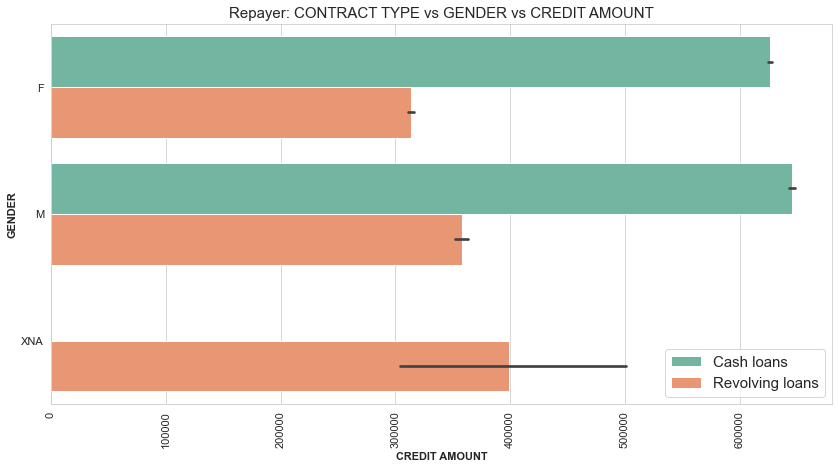

In [56]:
plt.figure(figsize=(14,7)) 

sns.barplot(data =target0, x='AMT_CREDIT',y='CODE_GENDER',   #Boxplot w.r.t Data Target 0
            hue ='NAME_CONTRACT_TYPE',orient='h',palette='Set2')

plt.legend( loc = 'lower right', fontsize=15)                                              #Adjusting legend position
plt.title('Repayer: CONTRACT TYPE vs GENDER vs CREDIT AMOUNT',fontsize=15 )
plt.xlabel('CREDIT AMOUNT',fontsize= 11, fontweight="bold")
plt.ylabel('GENDER',fontsize= 11, fontweight="bold")
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=360, fontsize=11)
plt.show()

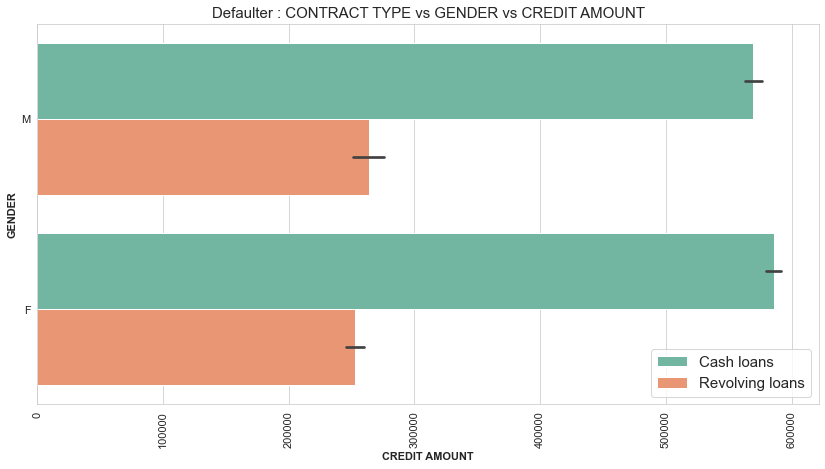

In [57]:
plt.figure(figsize=(14,7)) 

sns.barplot(data =target1, x='AMT_CREDIT',y='CODE_GENDER',   #Boxplot w.r.t Data Target 0
            hue ='NAME_CONTRACT_TYPE',orient='h',palette='Set2')

plt.legend( loc = 'lower right', fontsize=15)                                              #Adjusting legend position
plt.title('Defaulter : CONTRACT TYPE vs GENDER vs CREDIT AMOUNT',fontsize=15 )
plt.xlabel('CREDIT AMOUNT',fontsize= 11, fontweight="bold")
plt.ylabel('GENDER',fontsize= 11, fontweight="bold")
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=360, fontsize=11)
plt.show()

When we compare the Income type, Education Type and Family Status for repayers and defaults, we observe the following:
* In the Non-Defaulter graph we observe that Men take more Credit amount for both Revolving loans and Cash loans as compared to females.
* The defaulter graph shows that Females have higher Credit amount for Cash loans and Men have a higher Credit amount than Females for Revolving loans

### Heatmap of Categorical and Numerical Columns

Non-Payment Difficulties

In [58]:
catg = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
catg0 = target0[catg].corr(method = 'pearson')
catg0.iplot(kind = 'heatmap', colorscale = 'Blues', title = 'Categorical values and Numerical values Correlation(Non-Defaulters)')

In the Non-Defaulters heatmap, we observe:
* AMT_GOODS_PRICE has the highest correlation with AMT_CREDIT - 98%
* Second to that is the correlation between AMT_CREDIT and AMT_ANNUITY - 77%
* We also notice that AMT_TOTAL_INCOME has a 41% correlation with AMT_ANNUITY
* There is minimal correlation between the categorical and numerical values here. The highest percent approx 4%. These variables do not majorly affect each other.
* DAYS_BIRTH seem to have high correlation with all 'DAYS' columns, highest being between DAYS_EMPLOYED and DAYS_BIRTH i.e 62% and lowest correlation with DAYS_ID_PUBLISH ie. 27%

Payment Difficulties

In [59]:
catg = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
catg1 = target1[catg].corr(method = 'pearson')
catg1.iplot(kind = 'heatmap', colorscale = 'BuPu', title = 'Categorical values and Numerical values Correlation(Defaulters)')

Defaulters heatmap is almost similar to Non-Defaulters.


The only key difference is that, in the Non-Defaulters plot the Correlation between AMT_TOTAL_INCOME and AMT_ANNUITY was 41%,however, in Defaulters plot it has dropped to 4%.

### This concludes our analysis of application_data set

## ANALYSIS OF PREVIOUS APPLICATION DATA SET

## Data Dimensions

In [60]:
print ("Previous_application data row,columns:",previous_app.shape)

Previous_application data row,columns: (1670214, 37)


In [61]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Checking the Null Values

In [63]:
sum_null1 = previous_app.isnull().sum()
mean_null1 = round(100*(previous_app.isnull().sum()/len(previous_app.index)),2)
nulls1 = pd.concat([sum_null1, mean_null1], axis = 1)
nulls1.rename(columns = {0:'count', 1:'percentage'}, inplace = True)
nulls1

,count,percentage
SK_ID_PREV,0,0.00
SK_ID_CURR,0,0.00
NAME_CONTRACT_TYPE,0,0.00
AMT_ANNUITY,372235,22.29
AMT_APPLICATION,0,0.00
AMT_CREDIT,1,0.00
AMT_DOWN_PAYMENT,895844,53.64
AMT_GOODS_PRICE,385515,23.08
WEEKDAY_APPR_PROCESS_START,0,0.00
HOUR_APPR_PROCESS_START,0,0.00


In [64]:
nulls1[nulls1['count']>0]['count'].count()

16

There are 16 variables with null values, we'll check the ones with missing % above 40

In [65]:
previous_app_missing_data = nulls1[nulls1['percentage']>40.00]
previous_app_missing_data.reset_index(level=0, inplace=True)
previous_app_missing_data = previous_app_missing_data.sort_values('percentage', ascending=False)
print(len(previous_app_missing_data))
display(previous_app_missing_data)

11


,index,count,percentage
2,RATE_INTEREST_PRIMARY,1664263,99.64
3,RATE_INTEREST_PRIVILEGED,1664263,99.64
0,AMT_DOWN_PAYMENT,895844,53.64
1,RATE_DOWN_PAYMENT,895844,53.64
4,NAME_TYPE_SUITE,820405,49.12
5,DAYS_FIRST_DRAWING,673065,40.30
6,DAYS_FIRST_DUE,673065,40.30
7,DAYS_LAST_DUE_1ST_VERSION,673065,40.30
8,DAYS_LAST_DUE,673065,40.30
9,DAYS_TERMINATION,673065,40.30


In [66]:
fig = px.bar(previous_app_missing_data, x='index', y='percentage',title="Columns with NA counts > 45% ",
             labels={'index':'Column','percentage':'Percentage of Missing Data'}, height=600)
fig.show()

There are 11 columns with missing data above 45%

On the basis of our observation, we will drop the columns with NAN count > 40% (adhering to the industry standard).

In [67]:
previous_app = previous_app.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT',
                                'NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
                                  'DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1)

Dropping all Columns with XNA Values > 40%

In [68]:
previous_app = previous_app.drop(['NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY'], axis=1)

In [69]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

* There are 11 Numerical Columns
* There are 11 Categorical Columns

In [70]:
#Checking the number of columns with null values to be worked on

In [71]:
previous_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_PORTFOLIO                      0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### Missing value suggestions

In [72]:
previous_app['AMT_ANNUITY'].isnull().sum()

372235

In [73]:
previous_app['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

We observe that the median is less than mean. For better analysis, we can impute the lower value i.e Median for AMT_ANNUITY'

In [74]:
previous_app['AMT_CREDIT'].isnull().sum()

1

In [75]:
previous_app['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

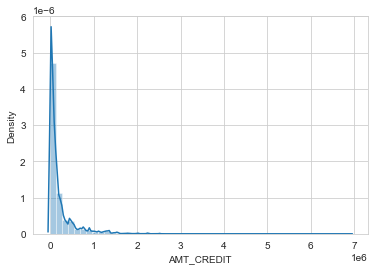

In [76]:
sns.set_style('whitegrid') 
sns.distplot(previous_app['AMT_CREDIT']) 
plt.show()

The data is left skewed. We can take Median to Fill NA for AMT_CREDIT'

In [77]:
previous_app['AMT_GOODS_PRICE'].isnull().sum()

385515

In [78]:
previous_app['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

Similarly, we can take Median to fill NA for AMT_GOODS_PRICE'

In [79]:
previous_app['CNT_PAYMENT'].isnull().sum()

372230

In [80]:
previous_app['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

We can impute NA for 'CNT_PAYMENT' with Median.

In [81]:
previous_app['PRODUCT_COMBINATION'].isnull().sum()

346

In [82]:
previous_app['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

Mode would be best to Fill NA for 'PRODUCT_COMBINATION'

#### Checking for any XNA values that ought to be filled

In [83]:
previous_app['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

We can take Mode to Fill NA for NAME_PAYMENT_TYPE'

In [84]:
previous_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

We can take Mode to Fill NA for NAME_CLIENT_TYPE'

In [85]:
previous_app['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

We can take Mode to Fill NA for NAME_PORTFOLIO'

In [86]:
previous_app['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

We can take Mode to Fill NA for NAME_YIELD_GROUP

### Converting Negative values to Absolute Values

In [87]:
previous_app[["DAYS_DECISION"]].head(3)

,DAYS_DECISION
0,-73
1,-164
2,-301


In [88]:
previous_app['DAYS_DECISION'] = abs(previous_app['DAYS_DECISION'])
previous_app[["DAYS_DECISION"]].head(3)

,DAYS_DECISION
0,73
1,164
2,301


## Outlier Analysis

Since outliers are mosly present in numerical data, let's check the number of numerical columns we will be analysing

In [89]:
numerical_col1 = previous_app.select_dtypes(include='number').columns
print(len(numerical_col1))
print(numerical_col1)

11
Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')


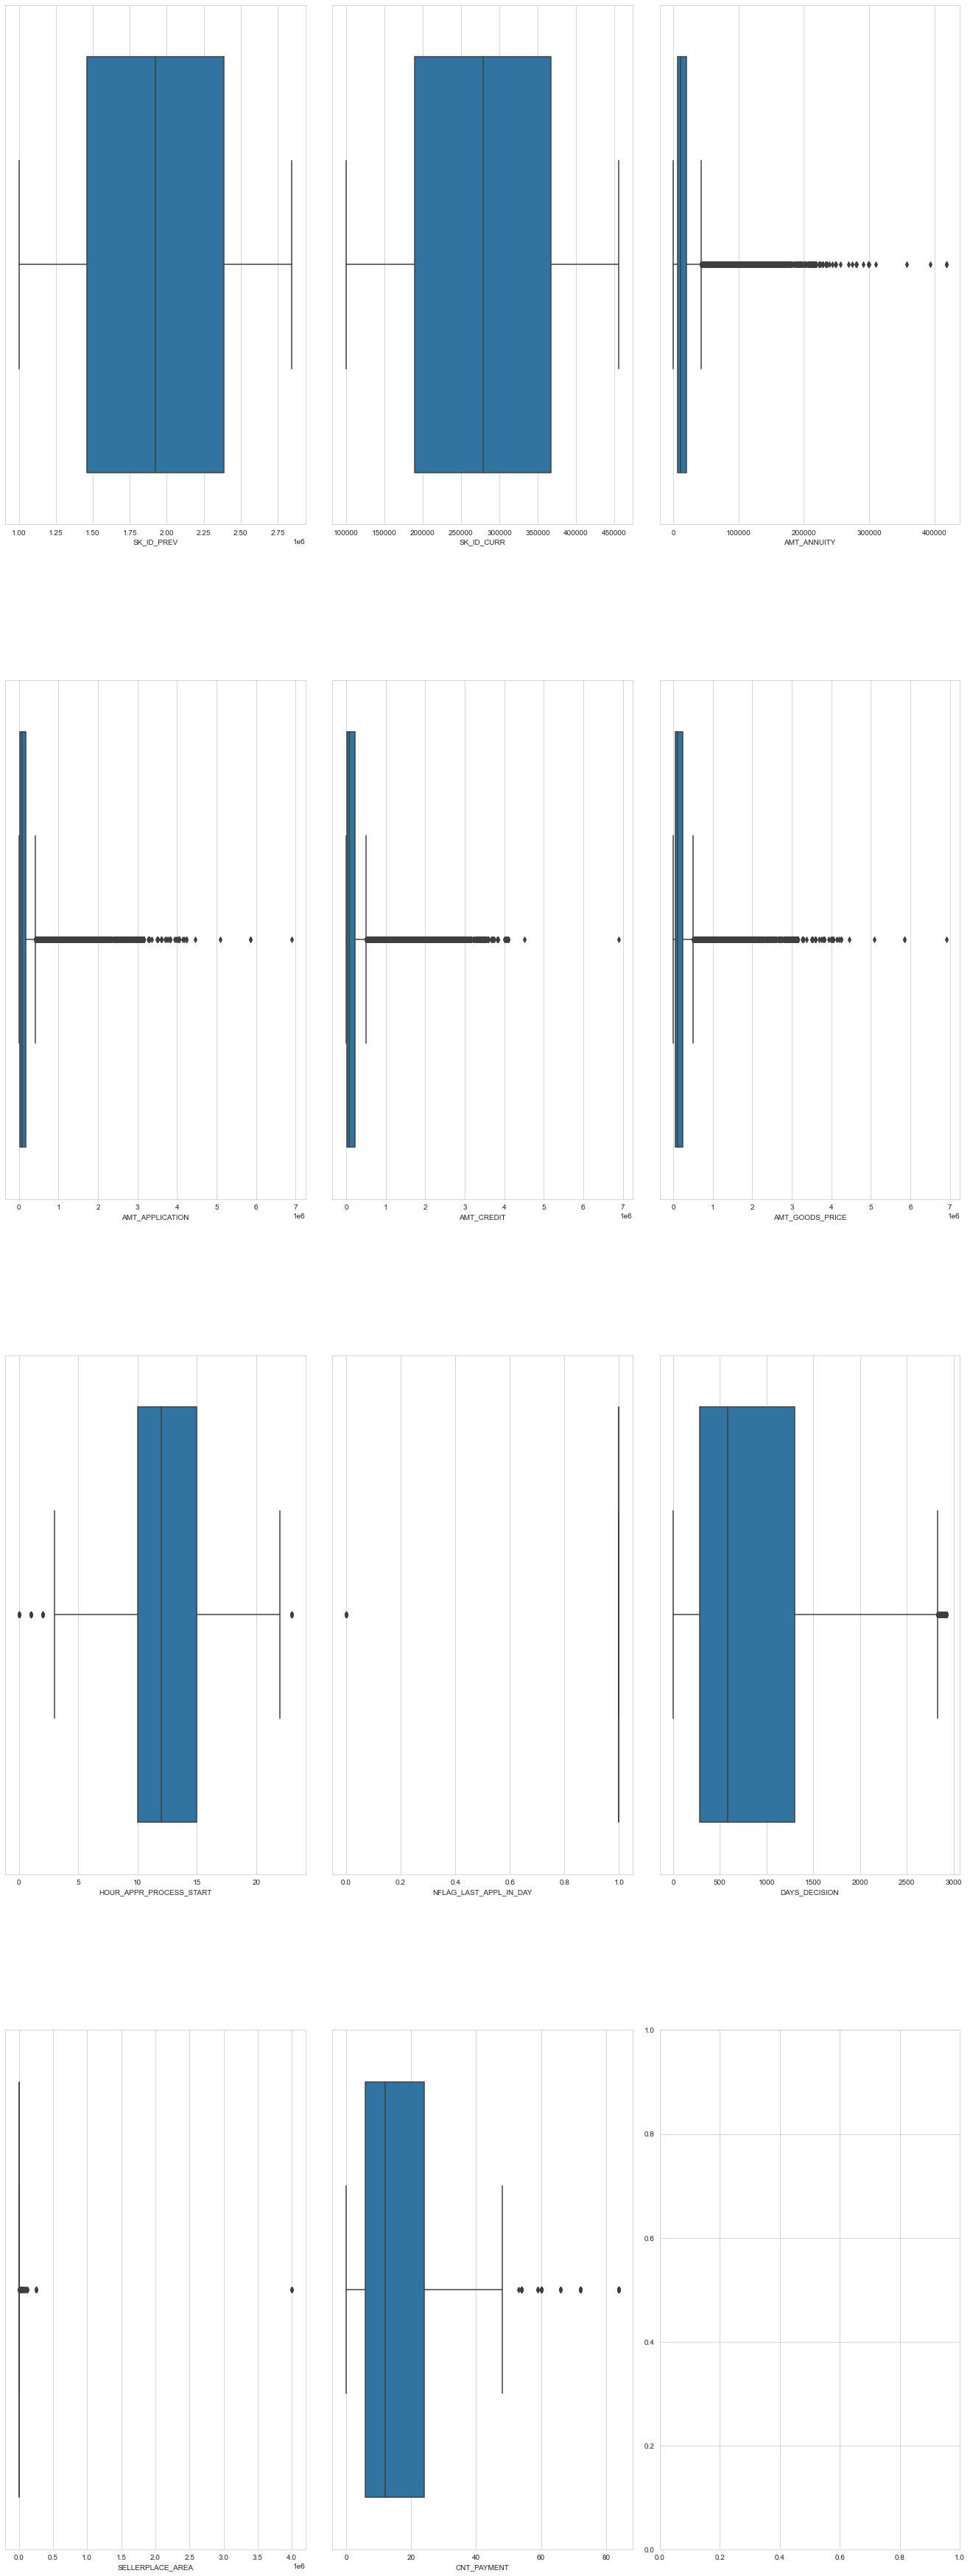

In [90]:
fig , axes = plt.subplots(nrows=4, ncols=3, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(),numerical_col1):        #Using For loop 
     sns.boxplot(previous_app[column],ax=ax)

INSIGHTS:

* Excluding ID Columns, all columns seem to have outliers


* IQR for RATE_DOWN_PAYMENT, AMT_APPLICATION, AMT_CREDIT and AMT_ANNUITY is very less with most of the data falling in the third quartile. They have a large number of outliers.


* IQR for AMT_DOWN_PAYMENT and NFLAG_LAST_APPL_IN_DAY is very slim.AMT_DOWN_PAYMENT has heavy outliers.


* HOUR_APPR_PROCESS_START has very few outliers, they lie below the first quartile and above third quartile.


* IQR of RATE_INTEREST_PRIMARY is slim and has outliers below the first quartile and a few above third quartile.

## Univariate Analysis

### Numerical Columns

1) 'AMT_CREDIT'

2) 'AMT_APPLICATION'

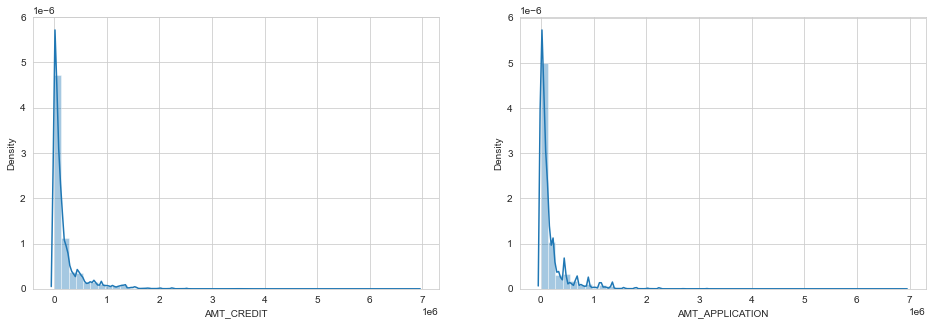

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(16, 5))
plt.subplot(121) 
sns.distplot(previous_app['AMT_CREDIT']); 
plt.subplot(122) 
sns.distplot(previous_app['AMT_APPLICATION'])
plt.show()

3) 'AMT_GOODS_PRICE'

4) 'HOUR_APPR_PROCESS_START'

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 5))
plt.subplot(121) 
sns.distplot(previous_app['AMT_GOODS_PRICE']); 
plt.subplot(122) 
sns.distplot(previous_app['HOUR_APPR_PROCESS_START']) 
plt.show()

### Categorical Columns

5) NAME_CONTRACT_TYPE

6) NAME_CONTRACT_STATUS

In [ ]:
plt.figure(1)
plt.subplot(131)
previous_app['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='DISTRIBUTION OF CONTRACT TYPE', color = sns.color_palette("Set2"))
plt.subplot(132)
previous_app['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.bar(title= 'DISTRIBUTION OF CONTRACT STATUS', color = sns.color_palette("Set1"))
plt.show()

* We see that most of the clients opt for Cash loans, followed closely by Consumer loans.
* It also looks like most loans are approved than cancelled or refused.
* 'Unused offer' is comparatively minimal.

## Bivariate Analysis

Let's check if Code Rejection reason has anything correlation with Contract Types

In [ ]:
bar1 =pd.crosstab(previous_app['CODE_REJECT_REASON'],previous_app['NAME_CONTRACT_TYPE']) 
bar1.div(bar1.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(9,7))
plt.show()

### Heatmap

Analysing the correlation between the driver variables

In [ ]:
catg = ['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT']
heat = previous_app[catg].corr(method = 'pearson')
heat.iplot(kind = 'heatmap', colorscale = 'Blues', title = 'Numerical values Correlation')

Insights:
* There is a high correlation between all the 'AMT' values, the highest being between 'AMT_GOODS_PRICE' and 'AMT_CREDIT'.
* HOUR_APPR_PROCESS_START and NFLAG_LAST_APPL_IN_DAY do not show strong correlations with any values
* CNT_PAYMENT has high correlation with all the 'AMT' values

#### This concludes our analysis of previous_app data set

### Merging application_data and previous_app data set

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
application_data = pd.read_csv("application_data.csv") #reloading the data
previous_app = pd.read_csv("previous_application.csv")
merged_data= pd.merge(application_data, previous_app, how='inner',on='SK_ID_CURR')
merged_data.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)

## ANALYSIS OF MERGED DATA SET

In [ ]:
display(merged_data.head())

In [ ]:
merged_data.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
merged_data.head()

In [ ]:
merged_data.info()

##### Dropping all columns with null value > 45%

In [ ]:
merged_data= merged_data.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis = 1)

In [ ]:
merged_data.info()

There are total 71 numerical columns an 23 Categorical Columns in the merged_data set

In [ ]:
merged_data.head()

### Converting all negatives to absolutes 
### Rounding up the values

In [ ]:
merged_data['DAYS_BIRTH'] = abs(merged_data['DAYS_BIRTH'])
merged_data['DAYS_EMPLOYED'] = abs(merged_data['DAYS_EMPLOYED'])
merged_data['DAYS_REGISTRATION'] = abs(merged_data['DAYS_REGISTRATION'])
merged_data['DAYS_ID_PUBLISH'] = abs(merged_data['DAYS_ID_PUBLISH'])

In [ ]:
merged_data['DAYS_BIRTH']= (merged_data['DAYS_BIRTH']/365).astype(int)
merged_data['DAYS_EMPLOYED'] = round(merged_data['DAYS_EMPLOYED']/365).astype(float)
merged_data['DAYS_REGISTRATION'] = round(merged_data['DAYS_REGISTRATION']/365).astype(float)
merged_data['DAYS_ID_PUBLISH'] = round(merged_data['DAYS_ID_PUBLISH']/365).astype(float)

In [ ]:
merged_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH",]].head(3)

### Dividing the data into Non-Defaulters and Defaulters based on 'TARGET' variable and running our analysis 

In [ ]:
target0 = merged_data.loc[merged_data["TARGET"]==0]
target1 = merged_data.loc[merged_data["TARGET"]==1]

1) Does distribution of region population affect loan payment? Let's check

In [ ]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=target0["REGION_POPULATION_RELATIVE"]
               ,x=target0["NAME_CONTRACT_TYPE_y"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = target1["REGION_POPULATION_RELATIVE"]
               ,x=target1["NAME_CONTRACT_TYPE_y"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

We see that clients in regions with High population density are less likely to default on loans.

2) Does Age effect loan payment? 

In [ ]:
fig = plt.figure(figsize=(13,15))
plt.subplot(221)
sns.distplot(target0["DAYS_BIRTH"],color="g")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(target1["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

We observe that younger people tend to default more than elder people.

## Heatmap

Correlations between all merged_data Columns

In [ ]:
corrmat = merged_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

# Conclusion

* All pre-processing steps were performed

* We have covered Null value imputation method

* Analyzing techniques such as Univariate analysis, Bivariate analysis, Models, were used

* Suggestion: we could look deeper into the Payment plan types arrive at the EMI using a better formula.